# My CNN 

## Dataset loading

In [15]:
import tensorflow as tf
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download test

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [17]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


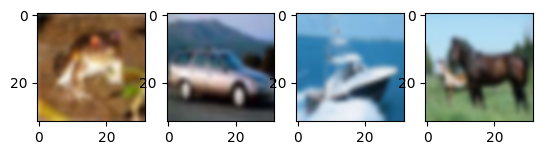

In [18]:
plt.subplot(141)
plt.imshow(x_train[0][:][:][:], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## Standardization (traning set 건드린 값으로, test set도 정규화)

120.70756512369792 64.1500758911213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-2.5247951877342226e-17 1.0000000000000022


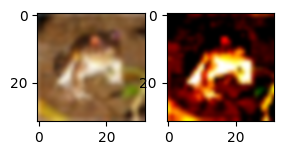

In [237]:
new_x_train = x_train
new_x_test = x_test

_mean = np.mean(x_train)
_std = np.std(x_train)
print(_mean, _std)
new_x_train = (new_x_train - _mean)/_std
new_x_test = (new_x_test - _mean)/_std
_mean = np.mean(new_x_train)
_std = np.std(new_x_train)
print(_mean, _std)

plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(new_x_train[0][:][:], interpolation="bicubic")
plt.grid(False)
plt.show()

## Traning

In [20]:
model = tf.keras.models.Sequential([
  # 1st
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),  
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#tf.keras.utils.plot_model(model, to_file='model02.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [21]:
val_scaled = new_x_test
val_target = y_test

history = model.fit(new_x_train, y_train, batch_size=256, epochs=15, validation_data=(val_scaled, val_target))
model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)

Epoch 1/15
196/196 [==============================] - 4s 15ms/step - loss: 1.6590 - accuracy: 0.4106 - val_loss: 1.7561 - val_accuracy: 0.4976
Epoch 2/15
196/196 [==============================] - 3s 13ms/step - loss: 1.2249 - accuracy: 0.5609 - val_loss: 1.5860 - val_accuracy: 0.5242
Epoch 3/15
196/196 [==============================] - 3s 13ms/step - loss: 1.0475 - accuracy: 0.6284 - val_loss: 1.4162 - val_accuracy: 0.6078
Epoch 4/15
196/196 [==============================] - 3s 13ms/step - loss: 0.9303 - accuracy: 0.6712 - val_loss: 1.3162 - val_accuracy: 0.6521
Epoch 5/15
196/196 [==============================] - 3s 14ms/step - loss: 0.8441 - accuracy: 0.7015 - val_loss: 1.2127 - val_accuracy: 0.6732
Epoch 6/15
196/196 [==============================] - 3s 15ms/step - loss: 0.7676 - accuracy: 0.7303 - val_loss: 1.1989 - val_accuracy: 0.7023
Epoch 7/15
196/196 [==============================] - 3s 14ms/step - loss: 0.7029 - accuracy: 0.7504 - val_loss: 1.1844 - val_accuracy: 0.6552

[0.8625856637954712, 0.7591000199317932]

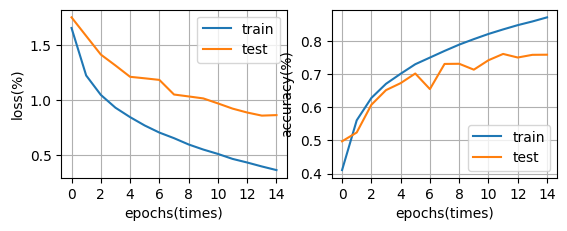

In [22]:
plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xticks(np.arange(0, 15, 2))
y1 = history.history['loss'][0]+0.3
y2 = history.history['loss'][-1]
#plt.yticks(np.arange(y1, y2, (y2-y1)/5))
plt.xlabel('epochs(times)')
plt.ylabel('loss(%)')
plt.legend(['train', 'test'])
#plt.show()
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xticks(np.arange(0, 15, 2))
yy1 = history.history['accuracy'][0]
yy2 = history.history['accuracy'][-1]+0.2
#plt.yticks(np.arange(yy1, yy2, (yy2-yy1)/5))
plt.xlabel('epochs(times)')
plt.ylabel('accuracy(%)')
plt.legend(['train', 'test'])
plt.show()


313/313 - 1s - loss: 0.8626 - accuracy: 0.7591 - 844ms/epoch - 3ms/step
index accuracy :
      airplane 86.59 %
      automobile 93.18 %
      bird 68.98 %
      cat 58.06 %
      deer 60.94 %
      dog 67.95 %
      frog 79.07 %
      horse 84.49 %
      ship 84.73 %
      truck 85.96 %


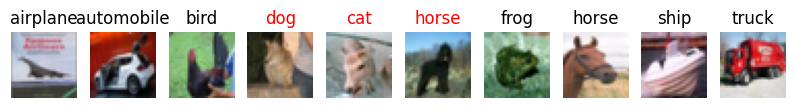

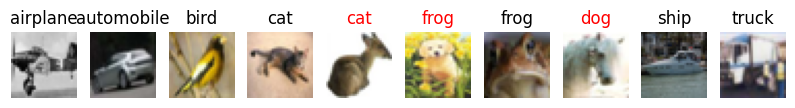

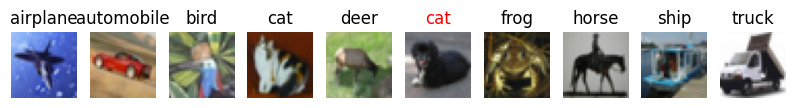

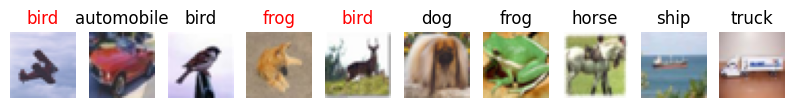

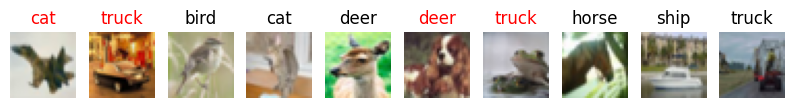

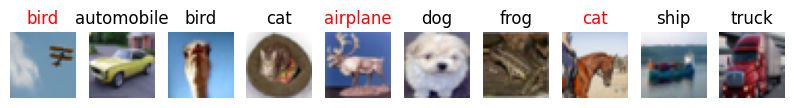

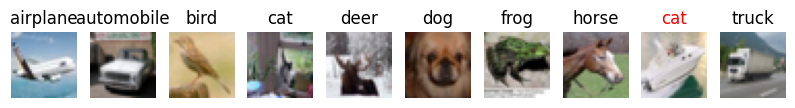

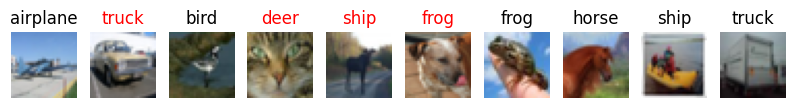

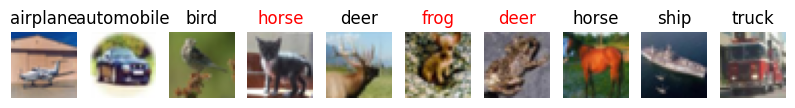

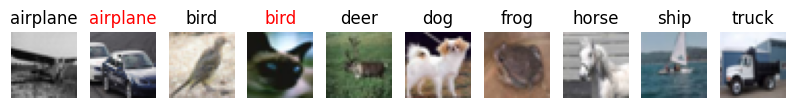

922


In [260]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)
dja = model(new_x_test)
dja = np.float64(dja)
tmp = np.zeros(10000)
index_accuracy_true = np.zeros(10)
index_accuracy_all = np.zeros(10)
for i in range(10000):
    tmp[i] = dja[i].argmax()
    if(tmp[i] == y_test[i]):
        index_accuracy_true[int(tmp[i])] += 1
    index_accuracy_all[int(tmp[i])] += 1

print('index accuracy :')
for i in range(10):
    print('     ', NAMES[i], round(index_accuracy_true[i] / index_accuracy_all[i] * 100, 2), '%')
dja = tmp

def show_images(images, labels, times=1, ncols=10):
    _me = 0
    for j in range(times):
        figure, axs = plt.subplots(figsize=(ncols, 1), nrows=1, ncols=ncols)
        _index = 0
        for i in range(10000):
            i += _me 
            if(_index == y_test[i]):           
                # say false
                if(y_test[i] != labels[i]):
                    axs[_index].set_title(NAMES[int(labels[i])], color='red')
                # say true 
                else:
                    axs[_index].set_title(NAMES[int(labels[i])])
                axs[_index].imshow(images[i])
                axs[_index].axis('off') 
                _index+=1
            elif(_index == 10):
                break
        plt.show()
        _me = i
    print(_me)

### Original image
show_images(x_test, dja, times=10)
### Standardization image
#show_images(new_x_test, dja, times=10)